# CNN practice - MNIST dataset


# Load libraries

In [103]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

## The dataset
Load the dataset and study it.

In [104]:
from tensorflow.keras.datasets import mnist

In [105]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [106]:
x_train.shape

(60000, 28, 28)

In [107]:
y_train.shape

(60000,)

In [108]:
single_image = x_train[0]

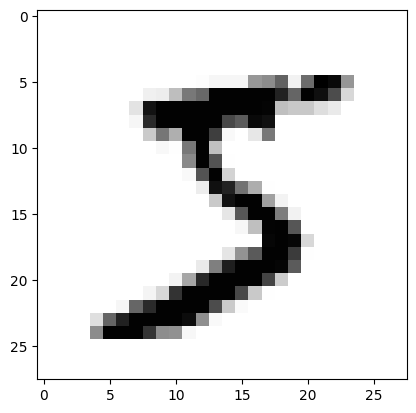

In [109]:
plt.imshow(single_image, cmap='Greys')

In [110]:
y_train[0]

5

## Data pre-processing

### Categorize
One step to take here is to ensure our model learns the output is categorical. In other words, we need to build a classifier model.

In [111]:
from tensorflow.keras.utils import to_categorical

In [112]:
# y_example = to_categorical(y_train,num_classes=10)
y_example = to_categorical(y_train)

In [113]:
y_example.shape

(60000, 10)

In [114]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

It shows that the y value is 5, not simply because it is the digit 5, but for it turned on the neuron corresponding to the category 5.

Now, let's categorize the y values, that is y_test and y_train.

In [115]:
y_test_cat = to_categorical(y_test)

In [116]:
y_train_cat = to_categorical(y_train)

### Normalize

In [117]:
single_image.min(), single_image.max()

(0, 255)

Let's assume that all images vary in the same range.

In [118]:
x_train = x_train/255

In [119]:
x_test = x_test/255

In [120]:
scaled_image = x_train[0]

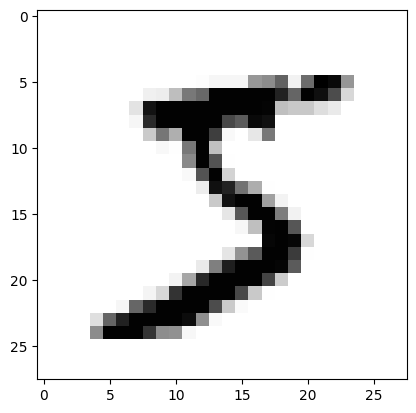

In [121]:
plt.imshow(scaled_image, cmap="Greys")

### Re-shape the data

In [122]:
x_train.shape

(60000, 28, 28)

To build our model, the data shape should make it clear about the number of channels required for the color.

In here, the pictures are BW, meaning that we have only 1 color channel. So, we need to reshape it to the following:

*batch_size, width, height, color_channels*


In [123]:
x_train = x_train.reshape(60000,28,28,1)

In [124]:
x_test_shp = x_test.shape

In [125]:
x_test = x_test.reshape(x_test_shp[0],x_test_shp[1],x_test_shp[2],1)

In [126]:
x_test.shape

(10000, 28, 28, 1)

## Creating and training the model
### Creating

In [127]:
from tensorflow.keras.models import Sequential

In [128]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [129]:
# DEFINE
model = Sequential()

# CONVOLUTIONAL LAYER(s)
model.add(Conv2D(filters=8, kernel_size=(4,4), strides=(2,2), padding='same',
                input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# EXTRA DENSE LAYER(s)
model.add(Dense(128, activation='relu'))

# OUTPUT LAYER
# Choose "softmax" for the activation as it is a multi-classifier
model.add(Dense(10, activation='softmax'))

# COMPILE
# Choose "categorical_crossentropy" for the loss,
# again because the model is a multi-classifier
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

### Training

In [130]:
from tensorflow.keras.callbacks import EarlyStopping

In [131]:
early_stop = EarlyStopping(monitor='val_loss',patience = 1)

In [132]:
model.fit(x_train, y_train_cat, epochs=10,
         validation_data = (x_test,y_test_cat),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2421 - accuracy: 0.9298 - val_loss: 0.0998 - val_accuracy: 0.9697
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9734 - val_loss: 0.0628 - val_accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.0621 - val_accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9840 - val_loss: 0.0533 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9867 - val_loss: 0.0539 - val_accuracy: 0.9816


## Evaluating the model

In [133]:
metrics = pd.DataFrame(model.history.history)

In [134]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.242143,0.929833,0.099785,0.9697
1,0.086900,0.973400,0.062751,0.9785
2,0.062910,0.980667,0.062075,0.9794
3,0.049641,0.984033,0.053347,0.9825
4,0.041049,0.986717,0.053885,0.9816


<Axes: >

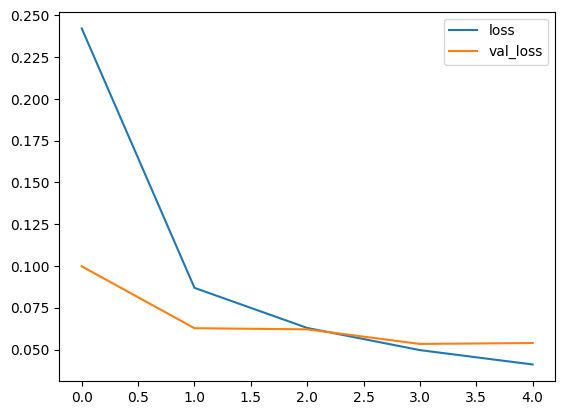

In [135]:
metrics[['loss','val_loss']].plot()

<Axes: >

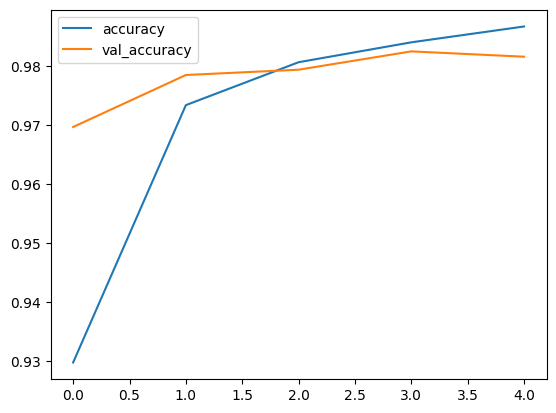

In [136]:
metrics[['accuracy','val_accuracy']].plot()

In [137]:
model.metrics_names

['loss', 'accuracy']

In [138]:
model.evaluate(x_test,y_test_cat,verbose=0)

[0.053885120898485184, 0.9815999865531921]

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 890us/step


In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       1.00      0.96      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [142]:
# confusion_matrix(y_test,predictions)

In [143]:
import seaborn as sns

<Axes: >

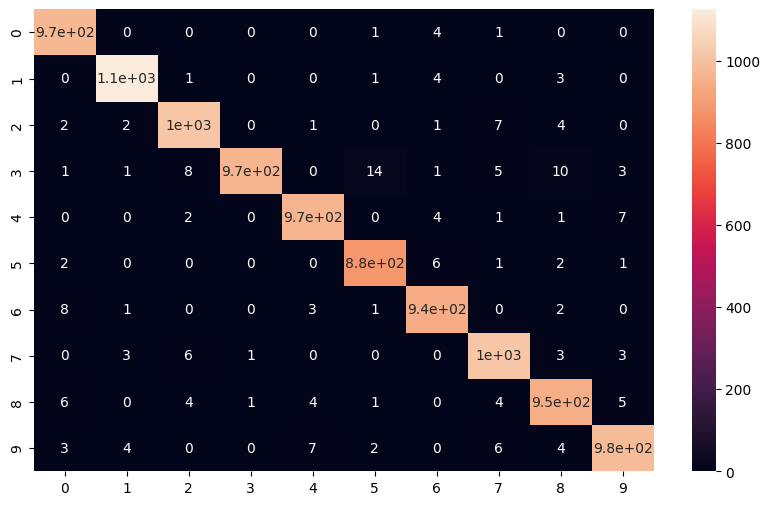

In [144]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

## Predict a single image

In [155]:
from random import randrange

1/1 [==============================] - 0s 13ms/step
Actual 5 vs Estimate [5]


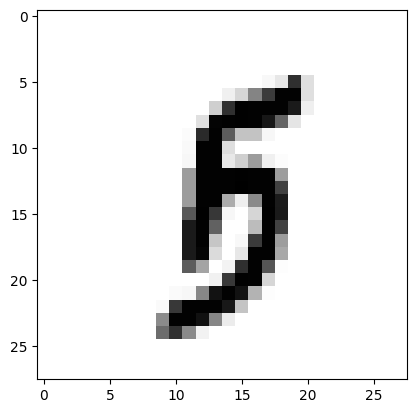

In [169]:
i = randrange(0,x_test_shp[0])
my_number = x_test[i].reshape(1,28,28,1)

my_num_pred = np.argmax(model.predict(my_number), axis=1)
my_num_real = y_test[i]

print("Actual {} vs Estimate {}".format(my_num_real,my_num_pred))

plt.imshow(my_number.reshape(28,28), cmap='Greys')